In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [4]:
#Let's make a dframe
dframe = DataFrame({'k1':['X','X','Y','Y','Z'],
                    'k2':['alpha','beta','alpha','beta','alpha'],
                    'dataset1':np.random.randn(5),
                    'dataset2':np.random.randn(5)})

#Show
dframe

,k1,k2,dataset1,dataset2
0,X,alpha,-0.854247,-1.403255
1,X,beta,-0.689286,0.212016
2,Y,alpha,-0.574699,2.362030
3,Y,beta,2.493855,-0.105372
4,Z,alpha,1.067663,0.520160


In [5]:
group_1 = dframe['dataset1'].groupby(dframe['k1'])

In [7]:
group_1

In [6]:
group_1.mean()

k1
X   -0.771766
Y    0.959578
Z    1.067663
Name: dataset1, dtype: float64

In [9]:
cities = np.array(['NY','LA','LA','NY','NY'])
months = np.array(['Jan','Feb','Jan','Feb','Jan'])

In [11]:
dframe['dataset1'].groupby([cities, months]).mean()

LA  Feb   -0.689286
    Jan   -0.574699
NY  Feb    2.493855
    Jan    0.106708
Name: dataset1, dtype: float64

In [15]:
dframe.groupby('k1').mean()

,dataset1,dataset2
k1,,
X,-0.771766,-0.595620
Y,0.959578,1.128329
Z,1.067663,0.520160


In [13]:
dframe.groupby('k1').size()

k1
X    2
Y    2
Z    1
dtype: int64

In [27]:
for i in dframe.groupby(['k1','k2']):
    print(i[1])

  k1     k2  dataset1  dataset2
0  X  alpha -0.854247 -1.403255
  k1    k2  dataset1  dataset2
1  X  beta -0.689286  0.212016
  k1     k2  dataset1  dataset2
2  Y  alpha -0.574699   2.36203
  k1    k2  dataset1  dataset2
3  Y  beta  2.493855 -0.105372
  k1     k2  dataset1  dataset2
4  Z  alpha  1.067663   0.52016


In [20]:
for name,group in dframe.groupby('k1'):
    print ('\nthis is {} group\n'.format(name))
    print (group)


this is ('X', 'alpha') group

  k1     k2  dataset1  dataset2
0  X  alpha -0.854247 -1.403255

this is ('X', 'beta') group

  k1    k2  dataset1  dataset2
1  X  beta -0.689286  0.212016

this is ('Y', 'alpha') group

  k1     k2  dataset1  dataset2
2  Y  alpha -0.574699   2.36203

this is ('Y', 'beta') group

  k1    k2  dataset1  dataset2
3  Y  beta  2.493855 -0.105372

this is ('Z', 'alpha') group

  k1     k2  dataset1  dataset2
4  Z  alpha  1.067663   0.52016


In [28]:
for (k1,k2),group in dframe.groupby(['k1','k2']):
    print(f'Key1 = {k1}, Key2 = {k2}')
    print()
    print(group,'\n')
    

Key1 = X, Key2 = alpha

  k1     k2  dataset1  dataset2
0  X  alpha -0.854247 -1.403255 

Key1 = X, Key2 = beta

  k1    k2  dataset1  dataset2
1  X  beta -0.689286  0.212016 

Key1 = Y, Key2 = alpha

  k1     k2  dataset1  dataset2
2  Y  alpha -0.574699   2.36203 

Key1 = Y, Key2 = beta

  k1    k2  dataset1  dataset2
3  Y  beta  2.493855 -0.105372 

Key1 = Z, Key2 = alpha

  k1     k2  dataset1  dataset2
4  Z  alpha  1.067663   0.52016 



In [22]:
group_dict = dict(list(dframe.groupby('k1')))
group_dict

{'X':   k1     k2  dataset1  dataset2
 0  X  alpha  0.814423  0.883518
 1  X   beta  0.644535 -0.154279, 'Y':   k1     k2  dataset1  dataset2
 2  Y  alpha -1.377077  1.014706
 3  Y   beta  1.070183 -0.434096, 'Z':   k1     k2  dataset1  dataset2
 4  Z  alpha -0.513807  1.071036}

In [24]:
list(dframe.groupby('k1'))

[('X',   k1     k2  dataset1  dataset2
  0  X  alpha  0.814423  0.883518
  1  X   beta  0.644535 -0.154279), ('Y',   k1     k2  dataset1  dataset2
  2  Y  alpha -1.377077  1.014706
  3  Y   beta  1.070183 -0.434096), ('Z',   k1     k2  dataset1  dataset2
  4  Z  alpha -0.513807  1.071036)]

In [23]:
group_dict['X']

,k1,k2,dataset1,dataset2
0,X,alpha,0.814423,0.883518
1,X,beta,0.644535,-0.154279


In [37]:
dict(list(dframe.groupby(dframe.dtypes,axis = 1)))


{dtype('float64'):    dataset1  dataset2
 0 -0.854247 -1.403255
 1 -0.689286  0.212016
 2 -0.574699  2.362030
 3  2.493855 -0.105372
 4  1.067663  0.520160, dtype('O'):   k1     k2
 0  X  alpha
 1  X   beta
 2  Y  alpha
 3  Y   beta
 4  Z  alpha}

In [37]:
group_dict_axis1 = dict(list(dframe.groupby(dframe.dtypes,axis = 1)))
group_dict_axis1

{dtype('float64'):    dataset1  dataset2
 0  0.202515  1.108967
 1 -1.145882 -0.055869
 2  0.497205 -0.330252
 3 -0.777478  0.311079
 4  1.573142 -0.094278, dtype('O'):   k1     k2
 0  X  alpha
 1  X   beta
 2  Y  alpha
 3  Y   beta
 4  Z  alpha}

In [41]:
group_dict_axis1.items()

dict_items([(dtype('float64'),    dataset1  dataset2
0  0.202515  1.108967
1 -1.145882 -0.055869
2  0.497205 -0.330252
3 -0.777478  0.311079
4  1.573142 -0.094278), (dtype('O'),   k1     k2
0  X  alpha
1  X   beta
2  Y  alpha
3  Y   beta
4  Z  alpha)])

In [44]:
dataset2_group = dframe.groupby(['k1','k2'])['dataset1']
dataset2_group.mean()

k1  k2   
X   alpha    0.202515
    beta    -1.145882
Y   alpha    0.497205
    beta    -0.777478
Z   alpha    1.573142
Name: dataset1, dtype: float64

In [45]:
#groupby dict series

In [47]:
animals = DataFrame(np.arange(16).reshape(4, 4),
                   columns=['W', 'X', 'Y', 'Z'],
                   index=['Dog', 'Cat', 'Bird', 'Mouse'])



#Show
animals

,W,X,Y,Z
Dog,0,1,2,3
Cat,4,5,6,7
Bird,8,9,10,11
Mouse,12,13,14,15


In [48]:
#Now lets add some NAN values
animals.loc[1:2, ['W', 'Y']] = np.nan

In [57]:
animals

,W,X,Y,Z
Dog,0.0,1,2.0,3
Cat,NaN,5,NaN,7
Bird,8.0,9,10.0,11
Mouse,12.0,13,14.0,15


In [52]:
behavior_map = {'W': 'good', 'X': 'bad', 'Y': 'good','Z': 'bad'}

In [53]:
animals_col = animals.groupby(behavior_map,axis=1)
animals_col.sum()

,bad,good
Dog,4.0,2.0
Cat,12.0,0.0
Bird,20.0,18.0
Mouse,28.0,26.0


In [54]:
behave_ser = Series(behavior_map)
behave_ser

W    good
X     bad
Y    good
Z     bad
dtype: object

In [55]:
animals.groupby(behave_ser,axis=1).count()

,bad,good
Dog,2,2
Cat,2,0
Bird,2,2
Mouse,2,2


In [56]:
animals.groupby(len(animals.index))

KeyError: 4

In [58]:
animals.groupby(len).sum()

,W,X,Y,Z
3,0.0,6,2.0,10
4,8.0,9,10.0,11
5,12.0,13,14.0,15


In [86]:
animals

,W,X,Y,Z
Dog,0.0,1,2.0,3
Cat,NaN,5,NaN,7
Bird,8.0,9,10.0,11
Mouse,12.0,13,14.0,15


In [59]:
str(animals.index)

"Index(['Dog', 'Cat', 'Bird', 'Mouse'], dtype='object')"

In [85]:
keys = ['A','B','A','B']

In [87]:
animals.groupby([len,keys]).max()

W   X     Y   Z
3 A   0.0   1   2.0   3
  B   NaN   5   NaN   7
4 A   8.0   9  10.0  11
5 B  12.0  13  14.0  15

In [61]:
hier_col = pd.MultiIndex.from_arrays([['NY','NY','NY','SF','SF'],[1,2,3,1,2]],names=['City','sub_value'])
hier_col

MultiIndex(levels=[['NY', 'SF'], [1, 2, 3]],
           codes=[[0, 0, 0, 1, 1], [0, 1, 2, 0, 1]],
           names=['City', 'sub_value'])

In [62]:
dframe_hier = DataFrame(np.arange(25).reshape(5,5),index = hier_col)
dframe_hier

0   1   2   3   4
City sub_value                    
NY   1           0   1   2   3   4
     2           5   6   7   8   9
     3          10  11  12  13  14
SF   1          15  16  17  18  19
     2          20  21  22  23  24

In [99]:
dframe_hier = DataFrame(np.arange(25).reshape(5,5),columns= hier_col)
dframe_hier

City       NY          SF    
sub_value   1   2   3   1   2
0           0   1   2   3   4
1           5   6   7   8   9
2          10  11  12  13  14
3          15  16  17  18  19
4          20  21  22  23  24

In [100]:
dframe_hier = dframe_hier*100


City         NY                SF      
sub_value     1     2     3     1     2
0             0   100   200   300   400
1           500   600   700   800   900
2          1000  1100  1200  1300  1400
3          1500  1600  1700  1800  1900
4          2000  2100  2200  2300  2400

In [101]:
dframe_hier

City         NY                SF      
sub_value     1     2     3     1     2
0             0   100   200   300   400
1           500   600   700   800   900
2          1000  1100  1200  1300  1400
3          1500  1600  1700  1800  1900
4          2000  2100  2200  2300  2400

In [102]:
#Aggregation

In [101]:
# Data Agrregation consists of operations that result in a scalar (e.g. mean(),sum(),count(), etc)

#Let's get a csv data set to play with
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/'


# Save thewinquality.csv file in the same folder as your ipython notebooks, note the delimiter used ;
dframe_wine = pd.read_csv('winequality-red.csv',sep=';')

In [102]:
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [103]:
dframe_wine['alcohol'].mean()

10.422983114446502

In [104]:
def max_to_min(arr):
    return arr.max() - arr.min()

In [105]:
max_to_min(dframe_wine['alcohol'])

6.5

In [106]:
wino = dframe_wine.groupby('quality')
wino.mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [107]:
wino.describe()

fixed acidity                                                     \
                count      mean       std  min   25%   50%     75%   max   
quality                                                                    
3                10.0  8.360000  1.770875  6.7  7.15  7.50   9.875  11.6   
4                53.0  7.779245  1.626624  4.6  6.80  7.50   8.400  12.5   
5               681.0  8.167254  1.563988  5.0  7.10  7.80   8.900  15.9   
6               638.0  8.347179  1.797849  4.7  7.00  7.90   9.400  14.3   
7               199.0  8.872362  1.992483  4.9  7.40  8.80  10.100  15.6   
8                18.0  8.566667  2.119656  5.0  7.25  8.25  10.225  12.6   

        volatile acidity            ... sulphates       alcohol             \
                   count      mean  ...       75%   max   count       mean   
quality                             ...                                      
3                   10.0  0.884500  ...     0.615  0.86    10.0   9.955000   
4                   53.0  0.693962  ...     0.600  2.00    53.0  10.265094   
5                  681.0  0.577041  ...     0.660  1.98   681.0   9.899706   
6                  638.0  0.497484  ...     0.750  1.95   638.0  10.629519   
7                  199.0  0.403920  ...     0.830  1.36   199.0  11.465913   
8                   18.0  0.423333  ...     0.820  1.10    18.0  12.094444   

                                                      
              std  min     25%     50%     75%   max  
quality                                               
3        0.818009  8.4   9.725   9.925  10.575  11.0  
4        0.934776  9.0   9.600  10.000  11.000  13.1  
5        0.736521  8.5   9.400   9.700  10.200  14.9  
6        1.049639  8.4   9.800  10.500  11.300  14.0  
7        0.961933  9.2  10.800  11.500  12.100  14.0  
8        1.224011  9.8  11.325  12.150  12.875  14.0  

[6 rows x 88 columns]

In [108]:
wino.agg(max_to_min)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,4.9,1.140,0.66,4.5,0.206,31.0,40.0,0.00609,0.47,0.46,2.6
4,7.9,0.900,1.00,11.6,0.565,38.0,112.0,0.00760,1.16,1.67,4.1
5,10.9,1.150,0.79,14.3,0.572,65.0,149.0,0.01059,0.86,1.61,6.4
6,9.6,0.880,0.78,14.5,0.381,71.0,159.0,0.01362,1.15,1.55,5.6
7,10.7,0.795,0.76,7.7,0.346,51.0,282.0,0.01256,0.86,0.97,4.8
8,7.6,0.590,0.69,5.0,0.042,39.0,76.0,0.00800,0.84,0.47,4.2


In [109]:
wino.agg('mean')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [110]:
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [111]:
dframe_wine['qual/alc ratio'] = dframe_wine['quality']/dframe_wine['alcohol']


In [112]:
dframe_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.531915
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0.510204
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0.510204
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0.612245
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.531915
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,0.531915
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5,0.531915
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7,0.700000
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7,0.736842
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,0.476190


In [113]:
dframe_wine.pivot_table(index=['quality'],aggfunc=np.mean)

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,qual/alc ratio,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,,
3,9.955000,0.122500,0.171000,0.997464,8.360000,11.000000,3.398000,0.303286,2.635000,0.570000,24.900000,0.884500
4,10.265094,0.090679,0.174151,0.996542,7.779245,12.264151,3.381509,0.392724,2.694340,0.596415,36.245283,0.693962
5,9.899706,0.092736,0.243686,0.997104,8.167254,16.983847,3.304949,0.507573,2.528855,0.620969,56.513950,0.577041
6,10.629519,0.084956,0.273824,0.996615,8.347179,15.711599,3.318072,0.569801,2.477194,0.675329,40.869906,0.497484
7,11.465913,0.076588,0.375176,0.996104,8.872362,14.045226,3.290754,0.614855,2.720603,0.741256,35.020101,0.403920
8,12.094444,0.068444,0.391111,0.995212,8.566667,13.277778,3.267222,0.668146,2.577778,0.767778,33.444444,0.423333


In [114]:
%matplotlib inline

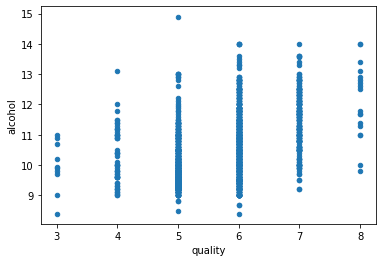

In [115]:
dframe_wine.plot(kind='scatter',x='quality',y='alcohol')

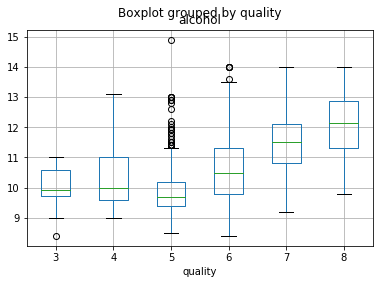

In [116]:
dframe_wine.boxplot(column='alcohol',by='quality')

In [117]:
#Splitting applying and combining

In [118]:
def ranker(df):
    df['alc_content_rank'] = np.arange(len(df)) + 1
    return df

In [119]:
dframe_wine.sort_values('alcohol',ascending = False,inplace = True)

In [120]:
dframe_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio
652,15.9,0.360,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.900000,5,0.335570
588,5.0,0.420,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.000000,8,0.571429
142,5.2,0.340,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6,0.428571
144,5.2,0.340,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6,0.428571
1270,5.0,0.380,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.000000,6,0.428571
1269,5.5,0.490,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.000000,8,0.571429
467,8.8,0.460,0.45,2.6,0.065,7.0,18.0,0.99470,3.32,0.79,14.000000,6,0.428571
821,4.9,0.420,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.000000,7,0.500000
1114,5.0,0.400,0.50,4.3,0.046,29.0,80.0,0.99020,3.49,0.66,13.600000,6,0.441176
1228,5.1,0.420,0.00,1.8,0.044,18.0,88.0,0.99157,3.68,0.73,13.600000,7,0.514706


In [121]:
dframe_wine = dframe_wine.groupby('quality').apply(ranker)

In [124]:
dframe_wine.sort_values(['alc_content_rank','quality'])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio,alc_content_rank
899,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.000000,3,0.272727,1
45,4.6,0.520,0.15,2.10,0.054,8.0,65.0,0.99340,3.90,0.56,13.100000,4,0.305344,1
652,15.9,0.360,0.65,7.50,0.096,22.0,71.0,0.99760,2.98,0.84,14.900000,5,0.335570,1
142,5.2,0.340,0.00,1.80,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6,0.428571,1
821,4.9,0.420,0.00,2.10,0.048,16.0,42.0,0.99154,3.71,0.74,14.000000,7,0.500000,1
588,5.0,0.420,0.24,2.00,0.060,19.0,50.0,0.99170,3.72,0.74,14.000000,8,0.571429,1
1299,7.6,1.580,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.900000,3,0.275229,2
1276,8.5,0.400,0.40,6.30,0.050,3.0,10.0,0.99566,3.28,0.56,12.000000,4,0.333333,2
353,13.5,0.530,0.79,4.80,0.120,23.0,77.0,1.00180,3.18,0.77,13.000000,5,0.384615,2
144,5.2,0.340,0.00,1.80,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6,0.428571,2


In [125]:
num_of_qual = dframe_wine['quality'].value_counts()

In [126]:
num_of_qual

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [64]:
dframe_wine[dframe_wine.alc_content_rank == 1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio,alc_content_rank
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5,0.335570,1
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,0.571429,1
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,0.428571,1
821,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,7,0.500000,1
45,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4,0.305344,1
899,8.3,1.02,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3,0.272727,1


In [5]:
from io import StringIO

In [6]:
data ="""\
Sample   Animal   Intelligence
1        Dog     Smart
2 Dog Smart
3 Cat Dumb
4 Cat Dumb
5 Dog Dumb
6 Cat Smart"""



In [7]:
data

'Sample   Animal   Intelligence\n1        Dog     Smart\n2 Dog Smart\n3 Cat Dumb\n4 Cat Dumb\n5 Dog Dumb\n6 Cat Smart'

In [8]:
#Store as dframe
dframe = pd.read_table(StringIO(data),sep='\s+')

In [9]:
dframe

,Sample,Animal,Intelligence
0,1,Dog,Smart
1,2,Dog,Smart
2,3,Cat,Dumb
3,4,Cat,Dumb
4,5,Dog,Dumb
5,6,Cat,Smart


In [10]:
pd.crosstab(dframe.Animal,dframe.Intelligence,margins = True)

Intelligence,Dumb,Smart,All
Animal,,,
Cat,2,1,3
Dog,1,2,3
All,3,3,6
